# Particle Optimization Algorithm

In [1]:
import random
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
plt.style.use('seaborn')

## Define PSO

In [3]:
W = 0.5
C1 = 0.8
C2 = 0.9

In [4]:
class Particle(object):
    
    def __init__(self):
        
        self.position = np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50])
        self.best_position = self.position
        self.best_value = float('inf')
        self.velocity = np.array([0, 0])
        
    def move(self):
        self.position = self.position + self.velocity
        
    def __str__(self):
        print(f'Particle in position: {self.position}, with best position: {self.best_position}')

In [5]:
class Space(object):
    
    def __init__(self, target, target_error, num_particles):
        
        self.particles = []
        
        self.target = target
        self.target_error = target_error
        self.num_particles = num_particles
        
        self.global_best_position = np.array([random.random()*50, random.random()*50])
        self.global_best_value = float('inf')
        
        self.fitness_score_to_plot = []
        
    def evaluate_fitness(self, particle):
        
        # the problem to solve here is to find the maximum of the following function
        fitness_score = particle.position[0] ** 2 + particle.position[1] ** 2 + 1

        return fitness_score

    def set_particle_best(self):
        
        for particle in self.particles:
            
            fitness_candidate = self.evaluate_fitness(particle)
            
            if (particle.best_value > fitness_candidate):
                
                particle.best_value = fitness_candidate
                particle.best_position = particle.position
                
    def set_global_best(self):
        
        for particle in self.particles:
            
            best_fitness_candidate = self.evaluate_fitness(particle)
            
            if (self.global_best_value > best_fitness_candidate):
                
                self.global_best_value = best_fitness_candidate
                self.global_best_position = particle.position
                
    def move_particles(self):
        
        for particle in self.particles:
            
            global W
            
            initial_velocity = (W * particle.velocity) + (C1 * random.random())
            cognitive_force = (particle.best_position - particle.position) + (random.random() * C2)
            social_force = (self.global_best_position - particle.position)
            
            new_velocity = initial_velocity * cognitive_force * social_force
            particle.velocity = new_velocity
            
            particle.move()
            
    def print_particles(self):
        
        for particle in self.particles:
            particle.__str__()

In [6]:
PSO = Space(target=1, target_error=1e-6, num_particles=30)
particles_vector = [Particle() for _ in range(PSO.num_particles)]

In [7]:
PSO.particles = particles_vector

## Train PSO

In [8]:
num_iterations = 50

In [9]:
for i_iter in range(1, num_iterations+1):
    
    PSO.set_particle_best()    
    PSO.set_global_best()

    if(abs(PSO.global_best_value - PSO.target) <= PSO.target_error):
        break

    PSO.move_particles()
    
    X = PSO.global_best_position[0]
    Y = PSO.global_best_position[1]
    fitness_score = PSO.global_best_value
    
    PSO.fitness_score_to_plot.append(fitness_score)
    
    print(f'Iteration: {i_iter}, the best solution is X: {X:.4f}, Y: {Y:.4f}, fitness score: {fitness_score:.4f}')

Iteration: 1, the best solution is X: -7.4973, Y: -3.0437, fitness score: 66.4741
Iteration: 2, the best solution is X: -0.6470, Y: -7.0187, fitness score: 50.6806
Iteration: 3, the best solution is X: -3.0914, Y: -4.8760, fitness score: 34.3323
Iteration: 4, the best solution is X: 1.3924, Y: -0.8460, fitness score: 3.6545
Iteration: 5, the best solution is X: -1.4089, Y: -0.5376, fitness score: 3.2738
Iteration: 6, the best solution is X: -1.4089, Y: -0.5376, fitness score: 3.2738
Iteration: 7, the best solution is X: 1.0695, Y: -0.8094, fitness score: 2.7990
Iteration: 8, the best solution is X: -0.3878, Y: -0.6496, fitness score: 1.5723
Iteration: 9, the best solution is X: -0.3878, Y: -0.6496, fitness score: 1.5723
Iteration: 10, the best solution is X: -0.1207, Y: -0.6027, fitness score: 1.3778
Iteration: 11, the best solution is X: -0.1207, Y: -0.6027, fitness score: 1.3778
Iteration: 12, the best solution is X: -0.1207, Y: -0.6027, fitness score: 1.3778
Iteration: 13, the best 

## Plot PSO

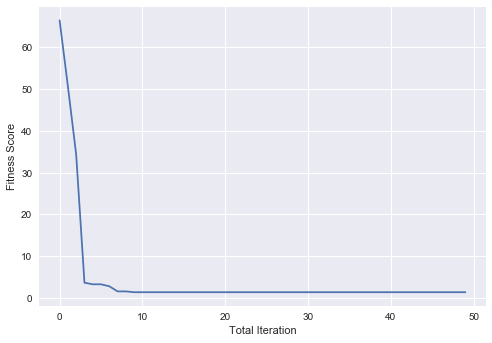

In [10]:
plt.plot(PSO.fitness_score_to_plot)
plt.xlabel('Total Iteration')
plt.ylabel('Fitness Score')
plt.savefig('./images/plot_fitness_score.png')
plt.show()

---